In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
dataframe = pd.read_csv("master.csv")

In [ ]:
dataframe.drop(['suicides/100k pop'],axis =1,inplace = True )
dataframe.rename(columns={"gdp_for_year ($) ":"gdp_for_year_usd","gdp_per_capita ($)":"gdp_per_capita_usd"},inplace=True)
dataframe["gdp_for_year_usd"] = dataframe["gdp_for_year_usd"].str.replace(',','').astype('int64')
dataframe = dataframe.query('year != 2016')

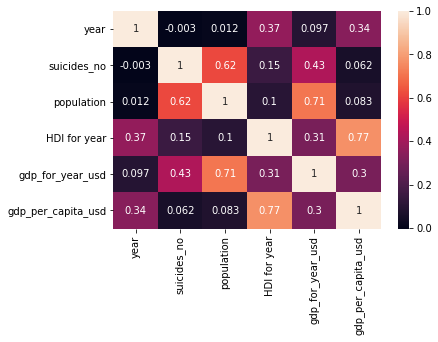

In [ ]:
sns.heatmap(dataframe.corr(),annot=True)

### Outliers

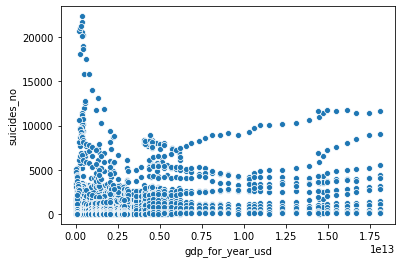

In [ ]:
sns.scatterplot(dataframe['gdp_for_year_usd'],dataframe['suicides_no'])

- HDI has missing values
- HDI has correlation with GDP
- Outliers are suicide rates of 125 and over based on gdp and hdi. let's drop them
- extreme values are removed

In [ ]:
dataframe = dataframe[dataframe['suicides_no'] < 125]
X = dataframe.drop(['suicides_no','gdp_per_capita_usd'],axis = 1)
y = dataframe['suicides_no'].copy()

In [ ]:
X.head(2)

,country,year,sex,age,population,country-year,HDI for year,gdp_for_year_usd,generation
0,Albania,1987,male,15-24 years,312900,Albania1987,NaN,2156624900,Generation X
1,Albania,1987,male,35-54 years,308000,Albania1987,NaN,2156624900,Silent


In [ ]:
numeric_features = ['year', 'gdp_for_year_usd', 'population']
categorical_features = ['country', 'sex', 'age', 'generation']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan,strategy="mean")),
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numeric_features),
    ("cat", OneHotEncoder(), categorical_features),
])
Xprep = full_pipeline.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xprep, y, test_size=0.2)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [ ]:
dff = pd.DataFrame({'Predict_test_values': y_pred_test})
dff

,Predict_test_values
0,51.934627
1,14.276630
2,50.891959
3,6.401416
4,3.313679
...,...
4105,-1.304373
4106,14.323390
4107,-29.409294
4108,63.626266


In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)


28.83956246640671


In [ ]:
X

,country,year,sex,age,population,country-year,HDI for year,gdp_for_year_usd,generation
0,Albania,1987,male,15-24 years,312900,Albania1987,NaN,2156624900,Generation X
1,Albania,1987,male,35-54 years,308000,Albania1987,NaN,2156624900,Silent
2,Albania,1987,female,15-24 years,289700,Albania1987,NaN,2156624900,Generation X
3,Albania,1987,male,75+ years,21800,Albania1987,NaN,2156624900,G.I. Generation
4,Albania,1987,male,25-34 years,274300,Albania1987,NaN,2156624900,Boomers
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,3620833,Uzbekistan2014,0.675,63067077179,Generation X
27816,Uzbekistan,2014,female,75+ years,348465,Uzbekistan2014,0.675,63067077179,Silent
27817,Uzbekistan,2014,male,5-14 years,2762158,Uzbekistan2014,0.675,63067077179,Generation Z
27818,Uzbekistan,2014,female,5-14 years,2631600,Uzbekistan2014,0.675,63067077179,Generation Z


In [ ]:
#For retrieving the slope:
regressor.coef_


array([  0.56179306,   0.92845057,   8.45440048, -18.80136884,
       -25.46626233,  28.23891228, -19.90083327, -24.76536296,
        35.75714693,  29.97665358, -19.56361566, -24.37448892,
       -23.89171923, -24.39244466,  27.29951209,  25.74488723,
       -24.73051354, -16.77759946, -12.77392867,  24.20772601,
       -22.92292045,  30.635052  ,  12.78367301,  14.82222838,
        -8.01058306,  18.42615914,  26.69830542, -24.4762312 ,
        30.29340509,  12.86398974, -25.79254055,  13.31733334,
        11.60848714,  -1.54834958, -22.74780793,  22.8792412 ,
         5.76436708, -14.65371186,   6.20106373,   1.51678126,
       -25.63064263,  -6.47244119, -13.96272105,  17.7981579 ,
       -23.01663093,   3.91008645,   2.45809536,   8.50300527,
       -25.37941413,  -2.9137321 ,  41.98631543, -25.15350633,
       -23.63472416,   8.69545588,   6.48460989,  22.98134693,
       -20.18244423, -22.49398552, -25.7130996 , -23.58099766,
       -15.53336401,  11.53824558, -21.87980072,  28.15

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df

,Actual,Predicted
909,30,51.934627
18301,2,14.276630
26078,53,50.891959
1112,1,6.401416
14185,1,3.313679
...,...,...
21338,1,-1.304373
9241,11,14.323390
1211,0,-29.409294
644,83,63.626266


In [ ]:
import sklearn.metrics as metrics

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('The model score is:', regressor.score(X_test, y_test))

Mean Absolute Error: 15.931230118988477
Mean Squared Error: 430.4269728569287
Root Mean Squared Error: 20.746734028683374
The model score is: 0.5524346693494264


In [ ]:
 regressor.score(X_test, y_test)

0.5524346693494264

In [ ]:
from sklearn.metrics import mean_squared_error
rms_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rms_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('The RMSE of the test set is: ' + rms_test.astype(str))
print('The RMSE of the training set is: ' + rms_train.astype(str))

The RMSE of the test set is: 20.987638713273522
The RMSE of the training set is: 20.903342320486


### DECISION AND AND RANDOM FOREST TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_testdt = tree_reg.predict(X_test)
y_pred_traindt = tree_reg.predict(X_train)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_testdt))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_testdt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_testdt)))
print('The model score is:', tree_reg.score(X_test, y_test))

Mean Absolute Error: 5.456934306569343
Mean Squared Error: 103.0749391727494
Root Mean Squared Error: 10.15258288184585
The model score is: 0.8928209147153666


In [ ]:
tree_reg.score(X_test,y_test)

0.893690887385223

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_testdt})
df1

,Actual,Predicted
12492,41,47.0
10677,0,0.0
19125,77,88.0
8424,1,2.0
2950,2,1.0
...,...,...
4099,0,0.0
10879,7,10.0
14476,0,3.0
10890,9,11.0


In [ ]:
from sklearn.metrics import mean_squared_error
rms_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rms_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('The RMSE of the test set is: ' + rms_test.astype(str))
print('The RMSE of the training set is: ' + rms_train.astype(str))

The RMSE of the test set is: 10.667423178769049
The RMSE of the training set is: 0.0


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train,y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [10.64541298  9.89039693 10.95708839 10.48611642  9.65591104  9.26876344
 11.05475224  9.12521938 10.31458912  9.89537477]
Mean: 10.129362469467956
Standard deviation: 0.6367347887731293


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_testrf = forest_reg.predict(X_test)
y_pred_trainrf = forest_reg.predict(X_train)

In [ ]:
forest_reg.score(X_test,y_test)

0.9429939207392706

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_testrf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_testrf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_testrf)))
print('The model score is:', forest_reg.score(X_test, y_test))

Mean Absolute Error: 4.309345498783456
Mean Squared Error: 54.72717919708028
Root Mean Squared Error: 7.397782045794556
The model score is: 0.9430937427309973


In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_testrf})
df2

,Actual,Predicted
18024,79,64.44
25734,22,20.49
14838,5,1.96
13165,1,0.51
11172,14,14.90
...,...,...
7821,24,33.32
6511,1,0.60
11866,8,4.36
4053,6,2.94


In [ ]:
from sklearn.metrics import mean_squared_error
rms_test = np.sqrt(mean_squared_error(y_test, y_pred_testrf))
rms_train = np.sqrt(mean_squared_error(y_train, y_pred_trainrf))
print('The RMSE of the test set is: ' + rms_test.astype(str))
print('The RMSE of the training set is: ' + rms_train.astype(str))

The RMSE of the test set is: 7.652444726489097
The RMSE of the training set is: 2.8262248759007798


### Support vector

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=8, C=100, epsilon=0.1,gamma = 'auto')
svm_poly_reg.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=8, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_test = svm_poly_reg.predict(X_test)
y_pred_train = svm_poly_reg.predict(X_train)
from sklearn.metrics import mean_squared_error
rms_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rms_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('The RMSE of the test set is: ' + rms_test.astype(str))
print('The RMSE of the training set is: ' + rms_train.astype(str))

The RMSE of the test set is: 35.2474536945566
The RMSE of the training set is: 35.06581755518677


### Bagging meta-estimator


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)


BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=1,
                                                      splitter='best'),
                 bootstrap=True

In [ ]:
y_pred_testbme = model.predict(X_test)
y_pred_trainbme = model.predict(X_train)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_testbme))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_testbme))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_testbme)))
print('The model score is:', model.score(X_test, y_test))

Mean Absolute Error: 4.472335766423359
Mean Squared Error: 58.45639659367396
Root Mean Squared Error: 7.645678295198795
The model score is: 0.9392160386779822


In [ ]:
df_bagging = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_testbme})
df_bagging

,Actual,Predicted
18024,79,57.0
25734,22,20.4
14838,5,2.4
13165,1,0.4
11172,14,14.2
...,...,...
7821,24,30.4
6511,1,0.4
11866,8,4.4
4053,6,2.7
